# Packages

In [226]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

# Seasonal Data

### Import the data

In [227]:
s_df = pd.read_csv('BirthMonthsData.csv',sep=',')

### Exploritory data analysis

In [228]:
s_df.shape

(53409, 7)

In [229]:
s_df.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Number_of_Births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267.0
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28.0
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24.0
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26.0
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16.0


Summary statistics

In [230]:
s_df.describe()

,Year,Number_of_Births
count,53409.000000,5.340900e+04
mean,1996.884982,3.889705e+04
std,14.153271,1.768072e+05
min,1967.000000,0.000000e+00
25%,1985.000000,4.970000e+02
50%,1998.000000,5.244000e+03
75%,2009.000000,2.092300e+04
max,2021.000000,4.265555e+06


In [231]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53409 entries, 0 to 53408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country or Area   53409 non-null  object 
 1   Year              53409 non-null  int64  
 2   Area              53409 non-null  object 
 3   Month             53409 non-null  object 
 4   Record Type       53409 non-null  object 
 5   Reliability       53409 non-null  object 
 6   Number_of_Births  53409 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [232]:
s_df.isnull().sum()

Country or Area     0
Year                0
Area                0
Month               0
Record Type         0
Reliability         0
Number_of_Births    0
dtype: int64

Visualize the data distribution

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Number_of_Births'}>]], dtype=object)

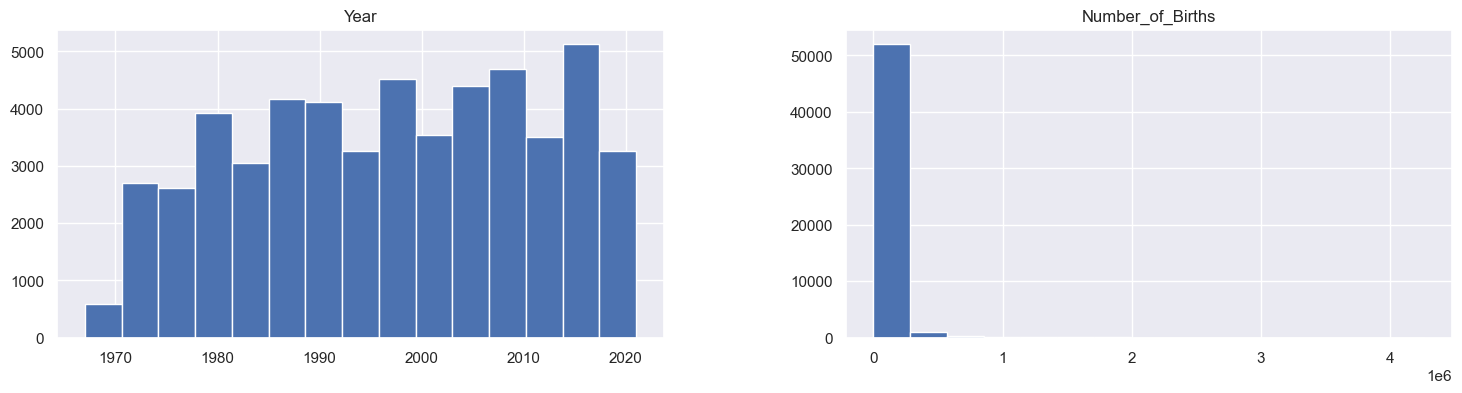

In [233]:
s_df.hist(bins=15)

In [234]:
s_df.columns

Index(['Country or Area', 'Year', 'Area', 'Month', 'Record Type',
       'Reliability', 'Number_of_Births'],
      dtype='object')

In [235]:
s_df.Month.value_counts()

Total                 4072
January               4072
April                 4068
March                 4062
May                   4056
February              4054
July                  4051
June                  4047
October               4041
September             4038
August                4037
November              4031
December              4024
Unknown                491
January - March         72
April - June            65
July - September        64
October - December      64
Name: Month, dtype: int64

Clean the data removing unecessary values

In [236]:
unkn_m = s_df.Month=='Unknown'
total_m = s_df.Month=='Total'
r1_m = s_df.Month=='January - March'
r2_m = s_df.Month=='April - June'
r3_m = s_df.Month=='October - December'
r4_m = s_df.Month=='July - September'

In [240]:
drp_rw = []
drp_rw.extend(s_df[unkn_m].index)
drp_rw.extend(s_df[total_m].index)
drp_rw.extend(s_df[r1_m].index)
drp_rw.extend(s_df[r2_m].index)
drp_rw.extend(s_df[r3_m].index)
drp_rw.extend(s_df[r4_m].index)

In [241]:
s_df.shape

(53409, 7)

In [242]:
s_df.drop(index=drp_rw,inplace=True)

In [243]:
s_df.shape

(48581, 7)

In [244]:
s_df.Month.value_counts()

January      4072
April        4068
March        4062
May          4056
February     4054
July         4051
June         4047
October      4041
September    4038
August       4037
November     4031
December     4024
Name: Month, dtype: int64

In [245]:
s_sub_df = s_df[['Year','Month','Number_of_Births']]

In [246]:
ss_df = s_sub_df.copy()

In [247]:
ss_df.sort_values('Year',inplace=True)

In [248]:
ss_df.reset_index(drop=True,inplace=True)

Inspect the average birth per month per year after data cleaning

In [258]:
ss_df.groupby('Year')['Number_of_Births'].mean()[:5]

Year
1967     5952.316667
1968     4914.138889
1969    36323.034722
1970    29284.876984
1971    21936.228501
Name: Number_of_Births, dtype: float64

In [261]:
ss_df.drop('Month',axis=1,inplace=True)

In [263]:
ss_df.set_index('Year',inplace=True)

Number of birth is given in units of Month per Year

In [264]:
ss_df.head()

,Number_of_Births
Year,
1967,1952.0
1967,2115.0
1967,2137.0
1967,2183.0
1967,1453.0


Plot the time series

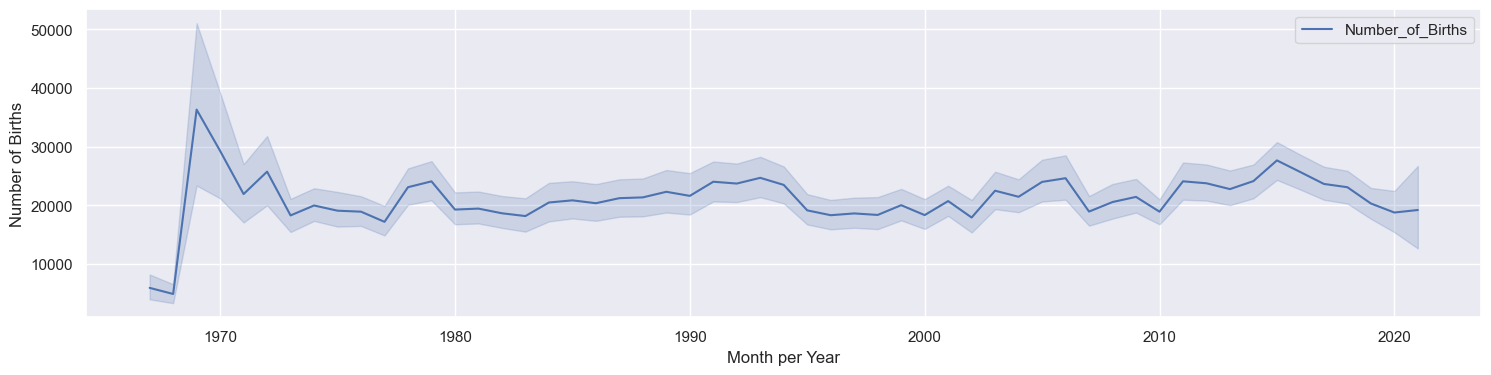

In [266]:
sns.lineplot(ss_df)
plt.ylabel('Number of Births');
plt.xlabel('Month per Year');

# Non-seasonal data

In [3]:
ns_df = pd.read_csv('price.csv',sep=',')

In [4]:
ns_df.shape

(13131, 81)

In [5]:
ns_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


<Axes: >

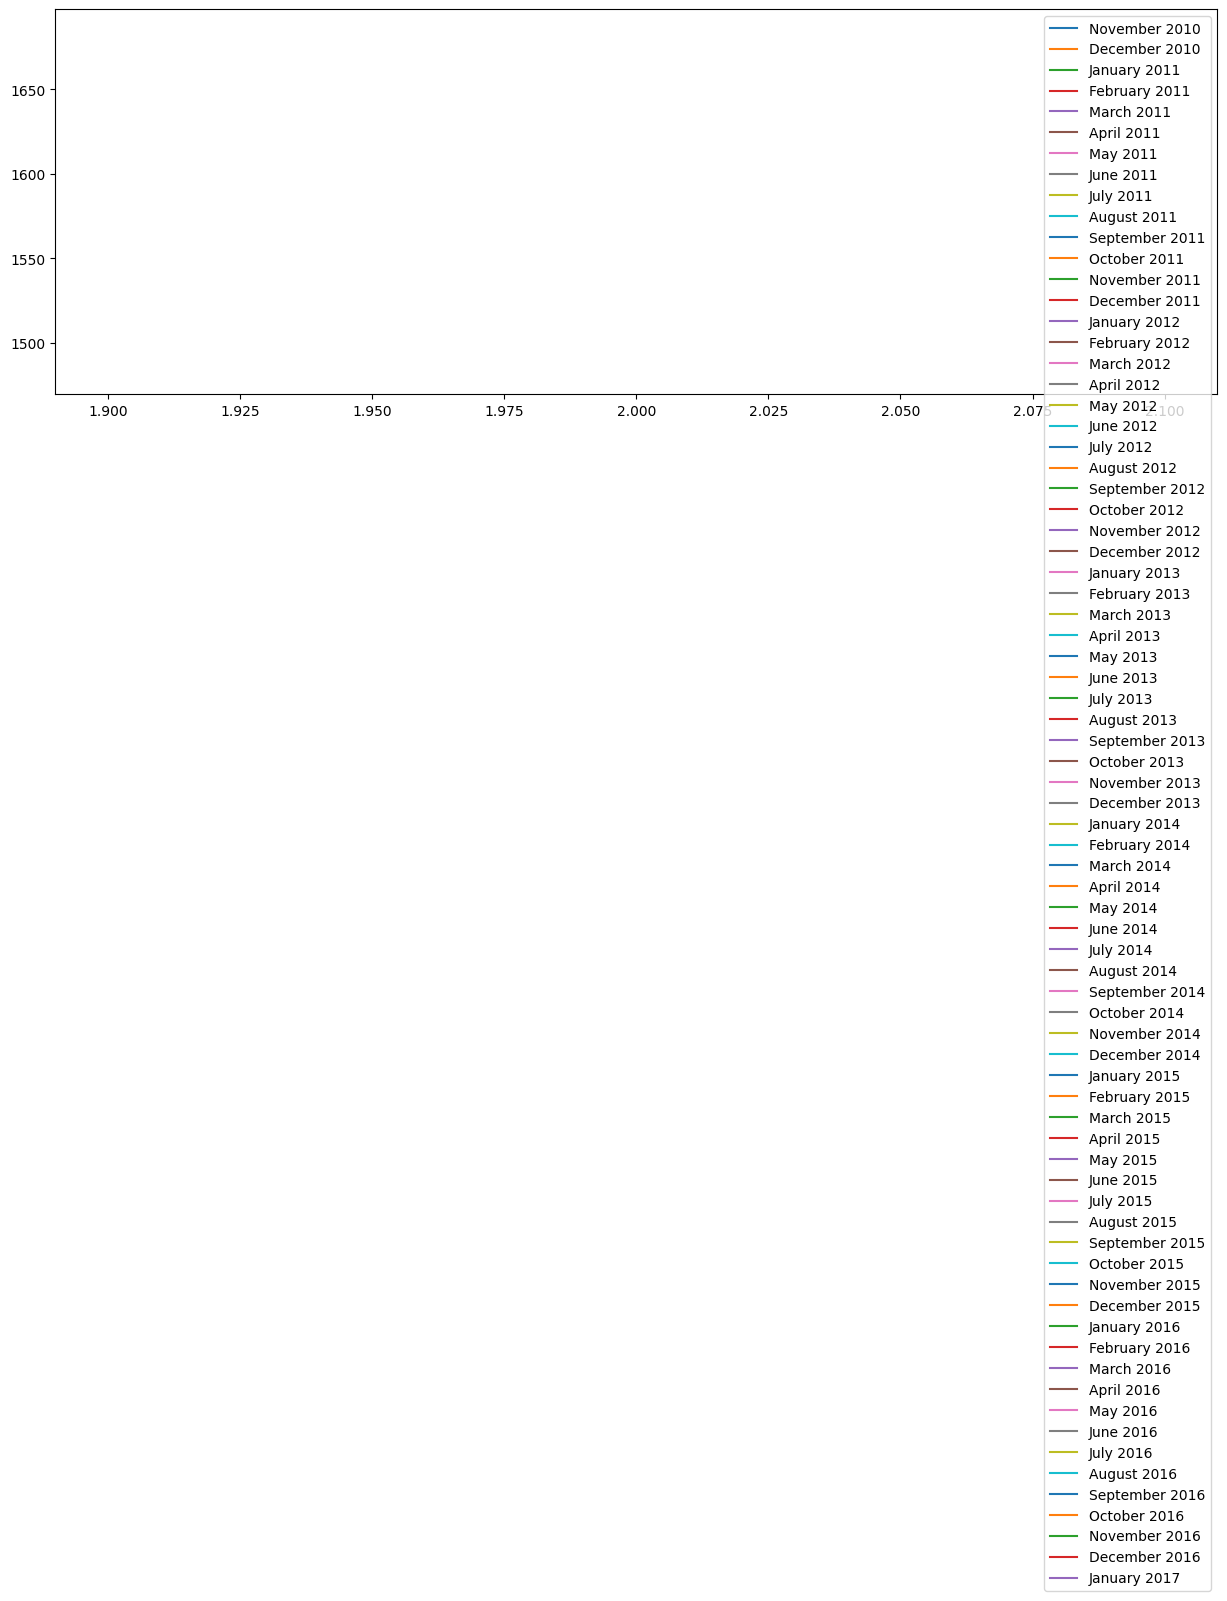

In [39]:
kwargs = {'kind':'line','figsize':(15,5)}

ns_df[ns_df.City.eq('Chicago')].iloc[:,6:].plot(**kwargs)

In [11]:
g_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,397405,Highland Township,Gettysburg,Adams,PA,13127,1280.0,1280.0,1284.0,1284.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,398292,Town of Wrightstown,Green Bay,Brown,WI,13128,639.0,650.0,668.0,694.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,398343,Urbana,Corning,Steuben,NY,13129,1433.0,1431.0,1437.0,1458.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,398839,Angels,NaN,Calaveras,CA,13130,1516.0,1529.0,1529.0,1515.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563
